In [30]:
def generate_rotating_gif(array, gif_save_path, n_points=None, force_overwrite=False, scan_number=None):

    fig = plt.figure(figsize=(9,9))
    ax = fig.add_subplot(111, projection='3d')
    x = array[:,0]
    y = array[:,1]
    z = array[:,2]
    c = array[:,3]


    an_array = np.where(c == 1, 1, 2)

    colors = ['sienna','green' ]

    cmap_arr= matplotlib.colors.ListedColormap(colors)



    # cmap = 'Greens'
    ax.scatter(x, y, z,
               zdir='z',
               c = an_array,
               cmap = cmap_arr,
               marker='.',
               s=1,
    )
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.grid(False)
    ax.xaxis.pane.fill = False # Left pane
    ax.yaxis.pane.fill = False # Right pane
    ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
    # Transparent panes
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # No ticks
    ax.set_xticks([]) 
    ax.set_yticks([]) 
    ax.set_zticks([])
    ax.set_box_aspect([max(x)-min(x),max(y)-min(y),max(z)-min(z)])
    def rotate(angle):
        ax.view_init(azim=angle)
    #rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 361, 2), interval=30)
    rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 361, 15), interval=300)
    #rot_animation.save('rotation.gif', dpi=80, writer='imagemagick')
    rot_animation.save(gif_save_path, dpi=80)

In [31]:
import open3d as o3d
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib

In [32]:
files = glob.glob('/home/travis/data/season_10/combined_pointclouds/*')
n=10
pcd_path = os.path.join(files[n], 'combined_multiway_registered.ply')
arr_path = pcd_path.replace('.ply', '.npy')

gif_path = './test.gif'

pcd_array = o3d.io.read_point_cloud(pcd_path)

arr = np.load(arr_path)
print(pcd_array)
print(arr)



pcd_array = np.c_[pcd_array.points, arr]




PointCloud with 97069 points.
[1 1 1 ... 1 1 1]


WARNING - 2021-11-30 12:03:13,471 - animation - MovieWriter ffmpeg unavailable; using Pillow instead.
INFO - 2021-11-30 12:03:13,472 - animation - Animation.save using <class 'matplotlib.animation.PillowWriter'>


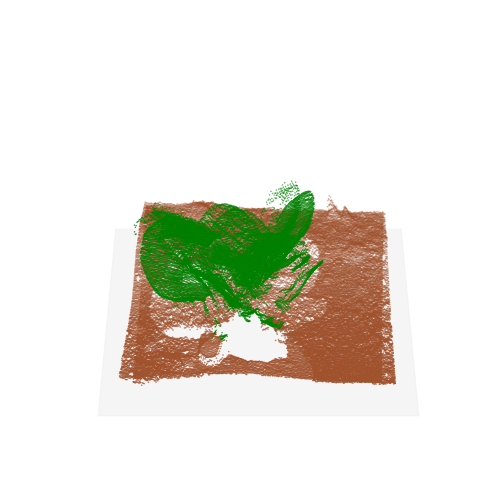

In [33]:
generate_rotating_gif(pcd_array, gif_path)